In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neural_network import MLPClassifier

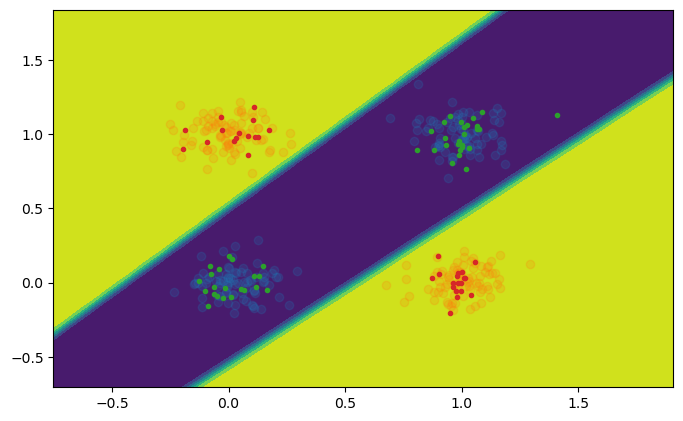

In [103]:
# XOR GATE DATASET CREATION
centers = [[0,0],[0,1],[1,0],[1,1]]
X, y = make_blobs(400,2,centers = centers,cluster_std=0.1)
y = np.array([1 if old == 1 or old == 2 else 0 for old in y])

# DATA SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# CLASSIFIER CREATION AND TRAINING
nn = MLPClassifier(hidden_layer_sizes=2, activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001)
nn.fit(X_train,y_train)

# GETTING PREDICTED LABELS FOR TEST DATA
y_pred = nn.predict(X_test)

# PLOTTING
fig, ax = plt.subplots(figsize=(8,5),dpi=100)

# DECISION BOUNDARY
DecisionBoundaryDisplay.from_estimator(nn, X, ax=ax, eps=0.5)

# TRAINING DATA (FADED)
for i in range(2):
  X_s = X_train[y_train == i]
  plt.scatter(X_s[:,0],X_s[:,1],alpha=0.2)

# TESTING DATA
for i in range(2):
  X_s = X_test[y_pred == i]
  plt.scatter(X_s[:,0],X_s[:,1],marker =".")



